In [12]:
!ln -s /content/drive/MyDrive/FMT ./fmt

ln: failed to create symbolic link './fmt/FMT': File exists


In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [14]:
df = pd.read_csv("./fmt/relatorio2_parte2.csv")

In [15]:
df

,yi [m],δ [m],ti1 [s],ti2 [s],ti3 [s],ti4 [s],ti5 [s],t_medio [s],σm,tm ± σm,tm + σm,tm - σm,σy,yi ± σy,yi + σy,yi - σy,yi ± δ,yi + δ,yi - δ,g [m/s²]
0,"0,05","0,0005","0,10160","0,11145","0,10950","0,11090","0,10065","0,10682","0,00235","0,10682 ± 0,00235","0,10917","0,10447","0,00251","0,05 ± 0,00251","0,05251","0,04749","0,05 ± 0,0005","0,0505","0,0495","8,763848326"
1,"0,1","0,0005","0,15195","0,15270","0,15315","0,15285","0,15260","0,15265","0,00020","0,15265 ± 0,0002","0,15285","0,15245","0,00058","0,1 ± 0,00058","0,10058","0,09942","0,1 ± 0,0005","0,1005","0,0995","8,582945965"
2,"0,15","0,0005","0,18685","0,18845","0,18640","0,18725","0,18720","0,18723","0,00034","0,18723 ± 0,00034","0,18757","0,18689","0,00080","0,15 ± 0,0008","0,15080","0,14920","0,15 ± 0,0005","0,1505","0,1495","8,55796252"
3,"0,2","0,0005","0,21730","0,21575","0,21515","0,21520","0,21725","0,21613","0,00048","0,21613 ± 0,00048","0,21661","0,21565","0,00113","0,2 ± 0,00113","0,20113","0,19887","0,2 ± 0,0005","0,2005","0,1995","8,563077693"
4,"0,25","0,0005","0,23215","0,24185","0,24210","0,24170","0,24170","0,23990","0,00194","0,2399 ± 0,00194","0,24184","0,23796","0,00459","0,25 ± 0,00459","0,25459","0,24541","0,25 ± 0,0005","0,2505","0,2495","8,687793875"
5,"0,3","0,0005","0,26185","0,26000","0,26035","0,25970","0,25175","0,25873","0,00178","0,25873 ± 0,00178","0,26051","0,25695","0,00455","0,3 ± 0,00455","0,30455","0,29545","0,3 ± 0,0005","0,3005","0,2995","8,963088268"
6,"0,35","0,0005","0,27705","0,27775","0,27665","0,27785","0,27790","0,27744","0,00025","0,27744 ± 0,00025","0,27769","0,27719","0,00084","0,35 ± 0,00084","0,35084","0,34916","0,35 ± 0,0005","0,3505","0,3495","9,094103412"
7,"0,4","0,0005","0,29845","0,29730","0,29795","0,29825","0,29675","0,29774","0,00031","0,29774 ± 0,00031","0,29805","0,29743","0,00105","0,4 ± 0,00105","0,40105","0,39895","0,4 ± 0,0005","0,4005","0,3995","9,024343523"
8,"0,45","0,0005","0,31660","0,31700","0,31665","0,31570","0,31610","0,31641","0,00023","0,31641 ± 0,00023","0,31664","0,31618","0,00087","0,45 ± 0,00087","0,45087","0,44913","0,45 ± 0,0005","0,4505","0,4495","8,989636019"
9,"0,5","0,0005","0,33170","0,33220","0,33145","0,33165","0,33215","0,33183","0,00015","0,33183 ± 0,00015","0,33198","0,33168","0,00069","0,5 ± 0,00069","0,50069","0,49931","0,5 ± 0,0005","0,5005","0,4995","9,081732504"


In [16]:
df1 = df.copy()

In [17]:
df1 = df.replace(',', '.', regex = True)

In [18]:
df1 = df1.drop(labels = ["tm ± σm", "yi ± σy", "yi ± δ"], axis = 1)

In [19]:
df1 = df1.astype("float")

In [20]:
df1.dtypes

yi [m]         float64
δ [m]          float64
ti1 [s]        float64
ti2 [s]        float64
ti3 [s]        float64
ti4 [s]        float64
ti5 [s]        float64
t_medio [s]    float64
σm             float64
tm + σm        float64
tm - σm        float64
σy             float64
yi + σy        float64
yi - σy        float64
yi + δ         float64
yi - δ         float64
g [m/s²]       float64
dtype: object

# Distância x tempo

## Ajuste polinomial

In [21]:
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

In [35]:
# x = tempo médio, y_mais_erro = comprimento mais propagação de erro,
# y_menos_erro = comprimento menos propagação de erro

x = df1["t_medio [s]"]
y = df1["yi [m]"]

y_mais_erro = df1["yi + σy"]
y_menos_erro = df1["yi - σy"]


xfit2 = np.linspace(0, 0.34, 1000)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit2[:, np.newaxis])

# Eixos para equação y = 1/2 * a * t²

xx = np.linspace(0, 0.33, 2000)
yy = (9.81 * (xx ** 2)) / 2

<ipython-input-35-2237d41ca23b>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(x[:, np.newaxis], y)


In [23]:
scores = cross_val_score(poly_model, x[:, np.newaxis], y, cv = 5)
scores.mean()

<ipython-input-23-6acbf60593e9>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores = cross_val_score(poly_model, x[:, np.newaxis], y, cv = 5)


0.9013440007836673

## Gráfico com ajuste polinomial

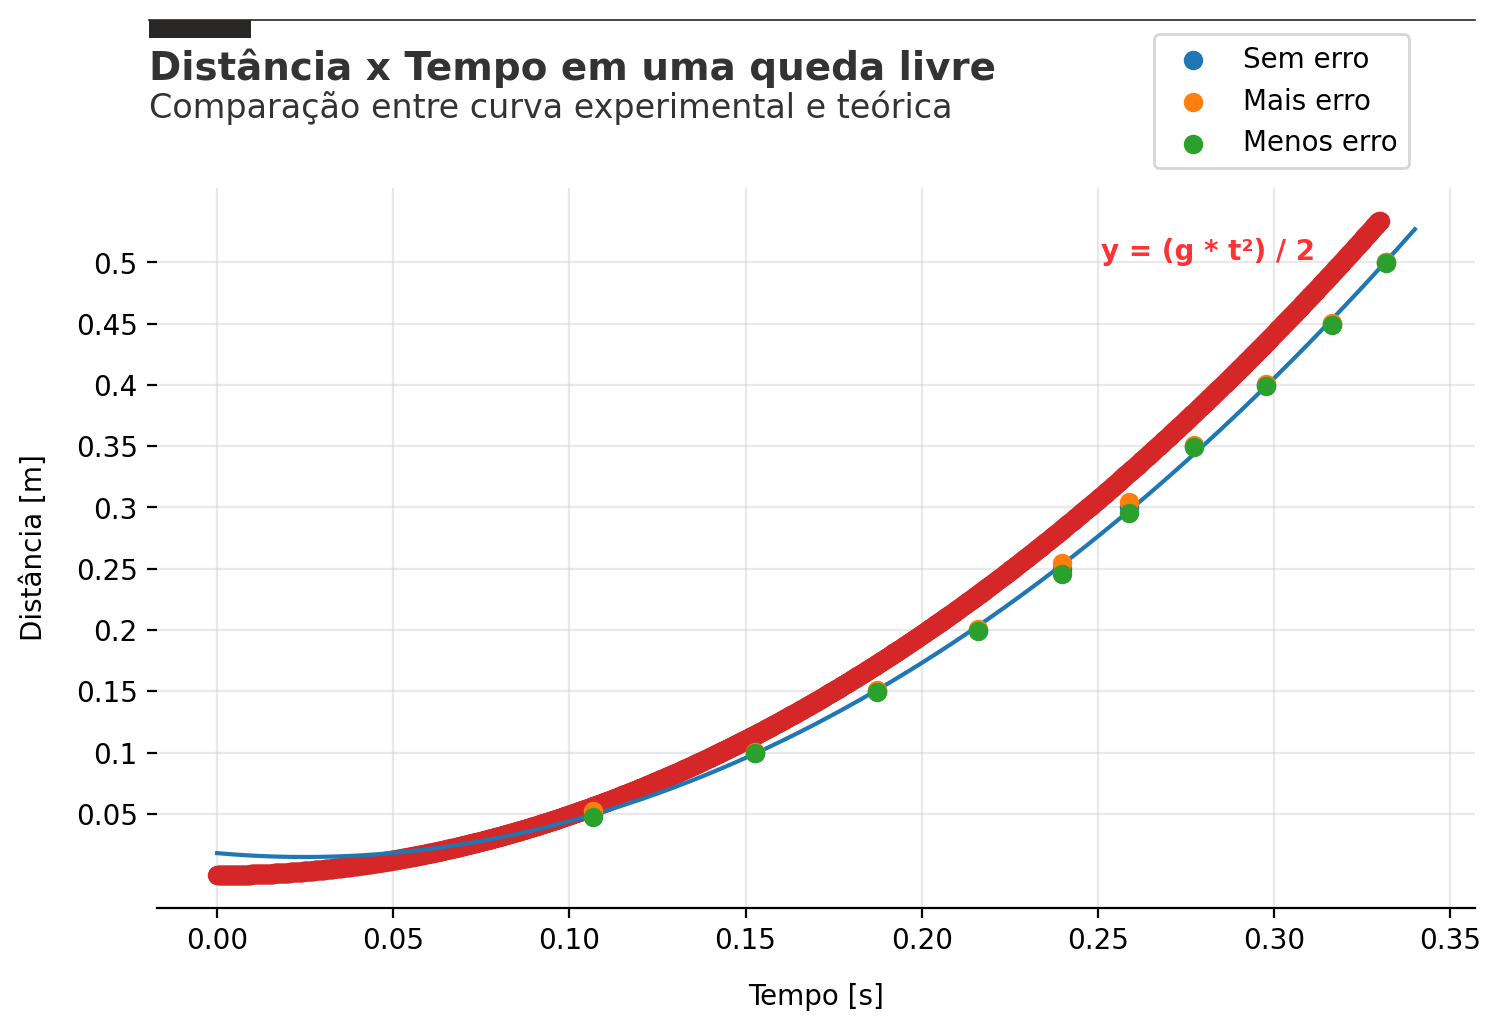

In [72]:
fig, ax = plt.subplots(figsize = (8.5, 6), dpi = 200)

ax.scatter(x, y, label = "Sem erro", zorder = 3)
ax.scatter(x, y_mais_erro, label = "Mais erro", zorder = 3)
ax.scatter(x, y_menos_erro, label = "Menos erro", zorder = 3)
ax.scatter(xx, yy, zorder = 2)

ax.plot(xfit2, yfit);


ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Distância [m]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Distância x Tempo em uma queda livre", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Comparação entre curva experimental e teórica", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.text(x = 0.68, y = 0.74, s = "y = (g * t²) / 2", transform = fig.transFigure, fontsize = 10, weight = 'bold', alpha = 0.8, c = "red")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.set_yticks(y, y)

ax.legend(loc = "best", ncol = 1, bbox_to_anchor = [0.95, 1.12], borderaxespad = 0, frameon = True, fontsize = 10);

plt.savefig("/content/fmt/distancia_tempo.png")

# Distância x tempo²

## Ajuste linear

In [25]:
# x_quadrado = tempo médio ao quadrado, y_mais_erro = comprimento mais propagação de erro,
# y_menos_erro = comprimento menos propagação de erro

x_quadrado = df1["t_medio [s]"] ** 2

y = df1["yi [m]"]
y_mais_erro = df1["yi + σy"]
y_menos_erro = df1["yi - σy"]


model = LinearRegression(fit_intercept = True)

model.fit(x_quadrado[:, np.newaxis], y)

xfit1 = np.linspace(0, 0.12, 1000)
yfit1 = model.predict(xfit1[:, np.newaxis])

<ipython-input-25-ca636fbc2796>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x_quadrado[:, np.newaxis], y)


In [26]:
scores = cross_val_score(model, x_quadrado[:, np.newaxis], y, cv = 5)
scores.mean()

<ipython-input-26-adfdb09ce553>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores = cross_val_score(model, x_quadrado[:, np.newaxis], y, cv = 5)


0.9393314200739713

## Gráfico com ajuste linear

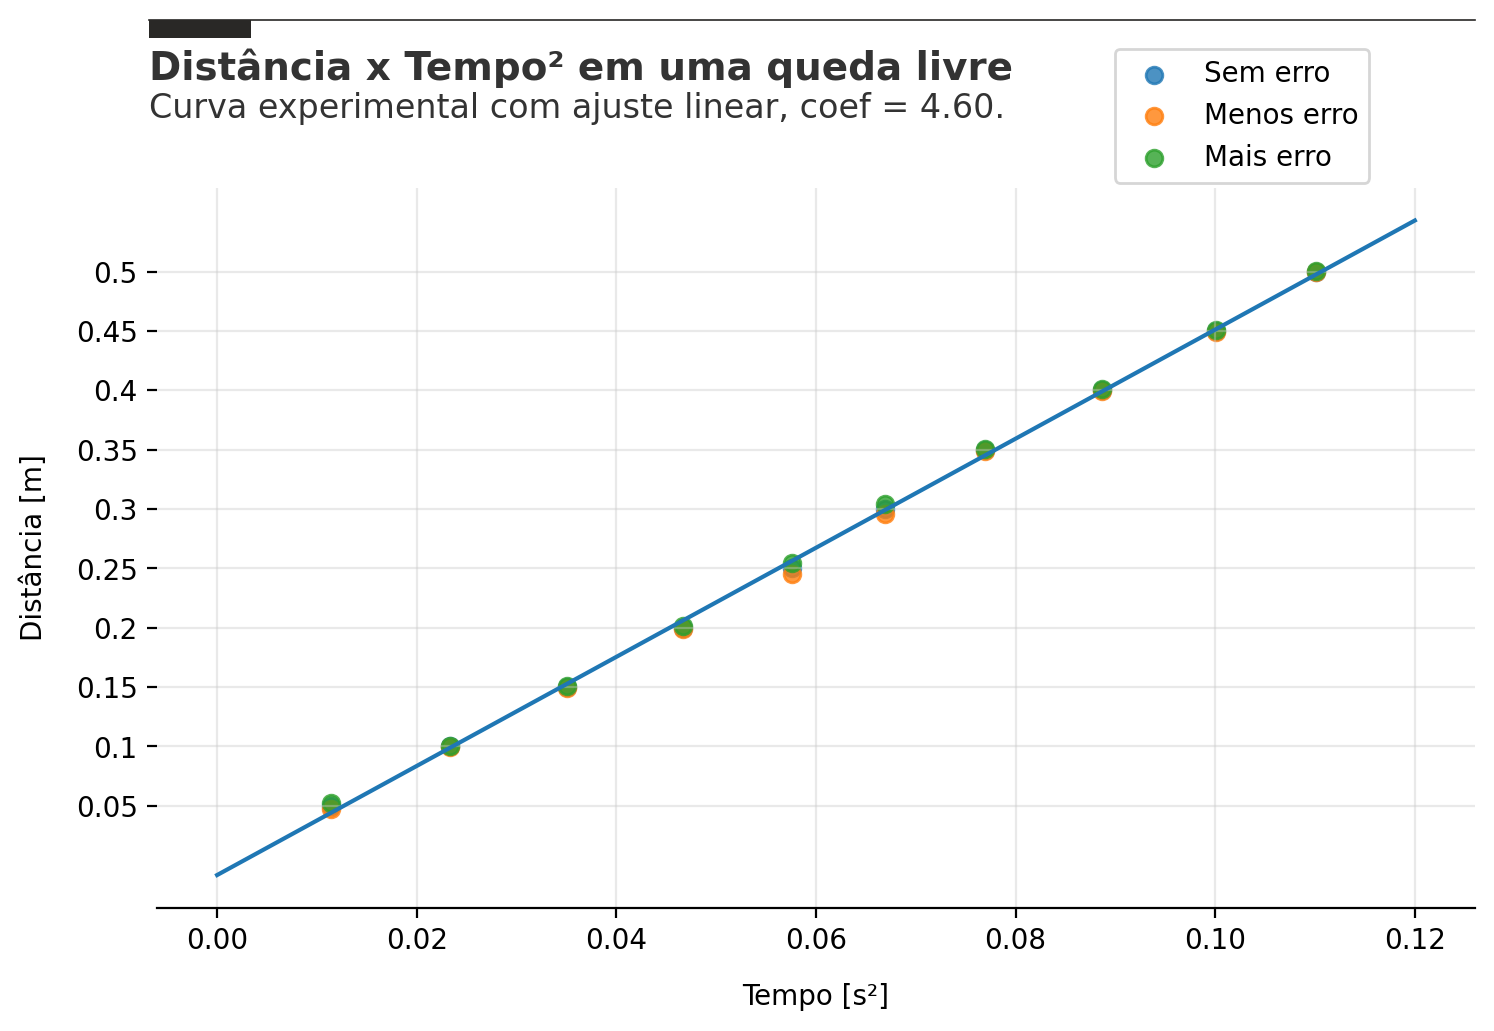

In [71]:
fig, ax = plt.subplots(figsize = (8.5, 6), dpi = 200)

ax.scatter(x_quadrado, y, alpha = 0.8, label = "Sem erro")
ax.scatter(x_quadrado, y_menos_erro, alpha = 0.8, label = "Menos erro")
ax.scatter(x_quadrado, y_mais_erro, alpha = 0.8, label = "Mais erro")

ax.plot(xfit1, yfit1);

ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Distância [m]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s²]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Distância x Tempo² em uma queda livre", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Curva experimental com ajuste linear, coef = 4.60.", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.set_yticks(y, y)

ax.legend(loc = "best", ncol = 1, bbox_to_anchor = [0.92, 1.1], borderaxespad = 0, frameon = True, fontsize = 10);

plt.savefig("/content/fmt/distancia_tempo_quadrado.png")

In [28]:
print("Model slope:  ", model.coef_[0])
print("Model intercept:  ", model.intercept_)

Model slope:   4.5948984548473515
Model intercept:   -0.008423218391703624
